In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
df = pd.read_csv(os.path.join('datos', 'df_limpio.csv'), encoding='utf-8', decimal=',')
df

,Marca,Modelo,Año,Kilometraje,Transmision,Precio
0,suzuki,baleno,2021,40000,1,11950000
1,suzuki,baleno,2019,55000,1,7950000
2,suzuki,baleno,2022,29588,1,10990000
3,suzuki,baleno,2021,51622,1,10290000
4,suzuki,baleno,2020,41113,1,9490000
...,...,...,...,...,...,...
1026,chery,tiggo-2,2018,70530,1,9980000
1027,chery,tiggo-2,2021,27000,2,11480000
1028,chery,tiggo-2,2023,814,1,10490000
1029,chery,tiggo-2,2021,16000,1,9590000


Seaborn Heatmap

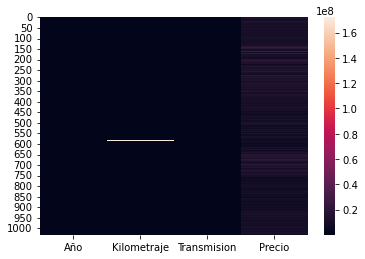

In [3]:
df_heatmap = df[['Año', 'Kilometraje', 'Transmision','Precio']]
sns.heatmap(df_heatmap)
plt.show()

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Cono tenemos solo 2 valores para la transmisión podemos separar el df en 2

[(0.0, 250000.0)]

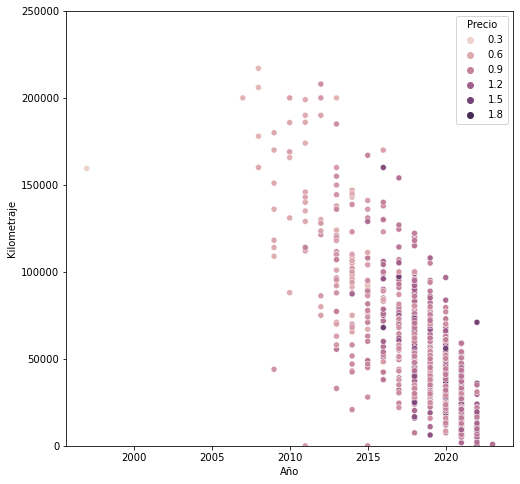

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

[(0.0, 250000.0)]

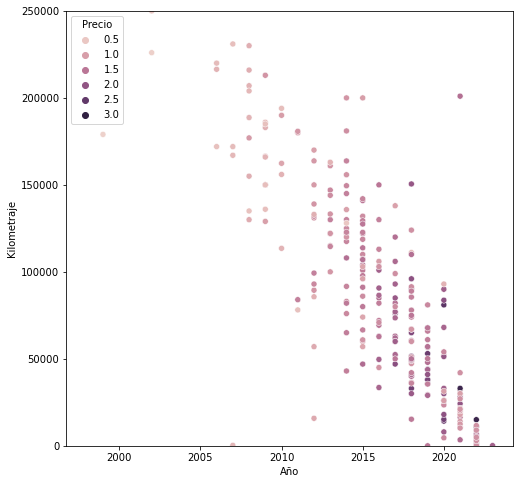

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_automatico = df[df['Transmision']==2]

graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

Se observa que hay una correlación(relativamente lineal), mientras más nuevo es el auto y menos kilometraje tiene más caro es el auto

# Clustering

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [8]:
# normalizar datos

df_numerico = df[['Año', 'Kilometraje', 'Transmision','Precio']]
scaler=StandardScaler()
dat_sc=scaler.fit_transform(df_numerico)

In [9]:
# método del codo para definir número de clústers
inertia = []
kmax = 15
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(dat_sc)

    #print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

c:\Users\ignac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


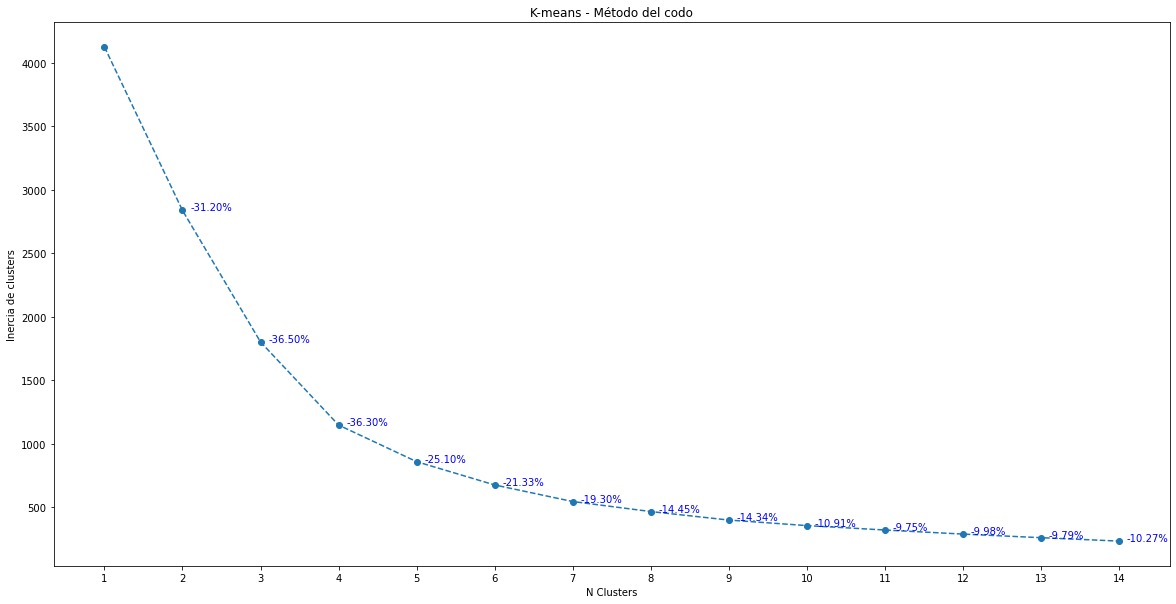

In [10]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

Vamos a considerar 4 clústers

In [11]:
kmeans = KMeans(n_clusters=6,random_state=0)
kcls = kmeans.fit(dat_sc)
df['kcls_labels']=kcls.labels_

In [12]:
df

,Marca,Modelo,Año,Kilometraje,Transmision,Precio,kcls_labels
0,suzuki,baleno,2021,40000,1,11950000,0
1,suzuki,baleno,2019,55000,1,7950000,0
2,suzuki,baleno,2022,29588,1,10990000,0
3,suzuki,baleno,2021,51622,1,10290000,0
4,suzuki,baleno,2020,41113,1,9490000,0
...,...,...,...,...,...,...,...
1026,chery,tiggo-2,2018,70530,1,9980000,0
1027,chery,tiggo-2,2021,27000,2,11480000,2
1028,chery,tiggo-2,2023,814,1,10490000,0
1029,chery,tiggo-2,2021,16000,1,9590000,0


[(0.0, 250000.0)]

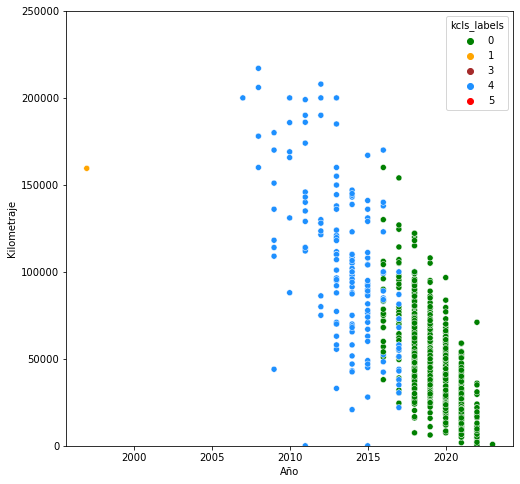

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red'])
graph.set(ylim=(0, 250000))

No tiene mucho sentido, no parece haber más relación que dividir por un rango de años

# Regresión

In [9]:
# división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Dividimos el dataframe de entrada, la misma separación de datos para todos los modelos
train,test = train_test_split(df, test_size=0.2, random_state=40) #para reproducir resultados

y_train = train.Precio
y_test = test.Precio

x_train = train[['Año', 'Kilometraje', 'Transmision']]
x_test = test[['Año', 'Kilometraje', 'Transmision']]


In [15]:
# Diccionarios para guardar errores, coeficientes
# comparamos los datos de entrenamiento y de prueba

coef_regresiones = {}

dic_R2_error_train = {}
dic_rmse_error_train = {}

dic_R2_error_test = {}
dic_rmse_error_test = {}

## Regresión Lineal

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()
# entrenar modelo con datos de entrenamiento
linreg.fit(x_train, y_train)
y_pred_train=linreg.predict(x_train)
# métricas de error entrenamiento
R2_lineal_train=linreg.score(x_train, y_train)
rmse_lineal_train=mean_squared_error(y_train, y_pred_train)

coef_regresiones['Regresión Lineal'] = linreg.coef_
dic_R2_error_train['Regresión Lineal'] = R2_lineal_train
dic_rmse_error_train['Regresión Lineal'] = rmse_lineal_train

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(x_test)
R2_lineal_test=linreg.score(x_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)
# métricas de error prueba
R2_lineal_test = linreg.score(x_test, y_test)
rmse_lineal_test=mean_squared_error(y_test, y_pred_test)

dic_R2_error_test['Regresión Lineal'] = R2_lineal_test
dic_rmse_error_test['Regresión Lineal'] = rmse_lineal_test

NameError: name 'coef_regresiones' is not defined

In [17]:
print(dic_R2_error_train['Regresión Lineal'], dic_rmse_error_train['Regresión Lineal'])

print(dic_R2_error_test['Regresión Lineal'], dic_rmse_error_test['Regresión Lineal'])

0.47502304509391513 7025779287447.8545
-0.28328229722623277 15278210728255.102


## Regresión Ridge

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


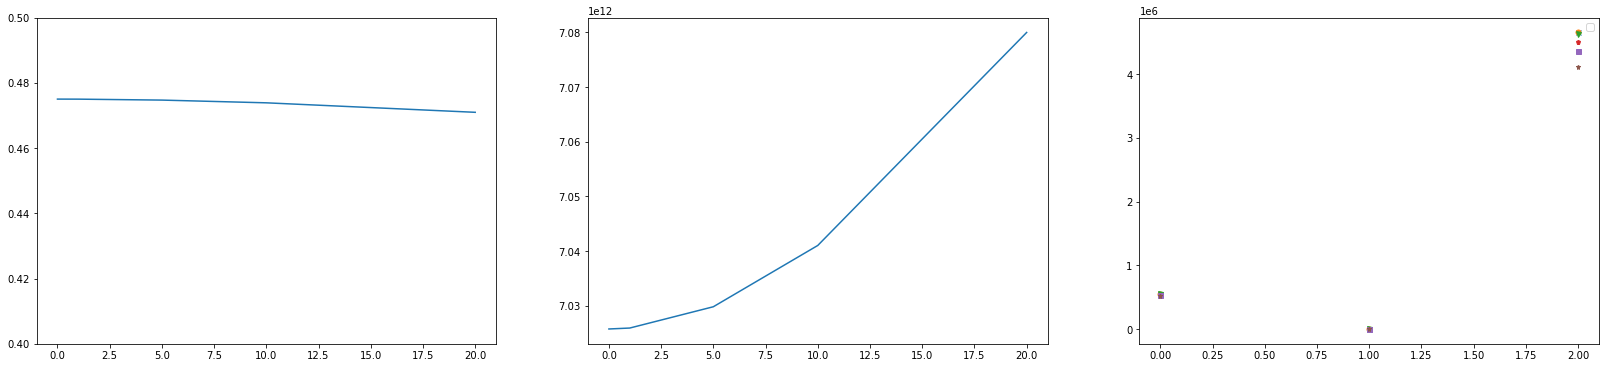

In [18]:
from sklearn.linear_model import Ridge

dic_error_R2_ridge = {}
dic_error_rsme_ridge = {}
dic_coefs_ridge = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas): 
    #print('Alpha:',al)
    rreg = Ridge(alpha=al)
    rreg.fit(x_train, y_train)

    y_train_pred = rreg.predict(x_train)
    train_score = rreg.score(x_train,y_train)
    dic_error_R2_ridge[al] = train_score
    dic_error_rsme_ridge[al] = mean_squared_error(y_train_pred, y_train)
    dic_coefs_ridge[al] = rreg.coef_

    # por ahora solo probar con datos de entrenamiento
    #y_test_pred = rreg.predict(x_test)
    #test_score = rreg.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_ridge.keys(), dic_error_R2_ridge.values())
ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_ridge.keys(), dic_error_rsme_ridge.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[0.001], linestyle='None', marker='x', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_ridge[20], linestyle='None', marker='*', markersize=5)
ax3.legend()    # agregar legend para diferenciar los valores de alpha
#.plot(np.arange(d+1),rreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)

## Lasso

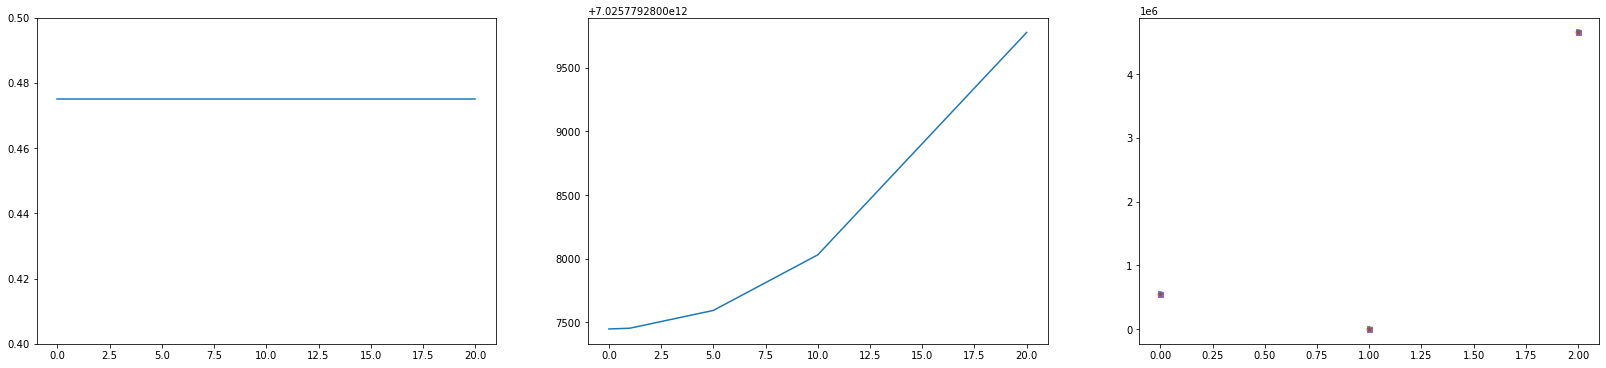

In [19]:
from sklearn.linear_model import Lasso

dic_error_R2_lasso = {}
dic_error_rsme_lasso = {}
dic_coefs_lasso = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas):
    lasso = Lasso(alpha=al)
    lasso.fit(x_train, y_train)

    #coeficientes de la regresión
    #print(rreg.coef_)
    dic_coefs_lasso[al] = lasso.coef_

    #predecimos respuesta para datos de entrenamiento y prueba
    y_train_pred = lasso.predict(x_train)
    y_test_pred = lasso.predict(x_test)

    #Cálculo de error (MSE) para datos de entrenamiento y prueba
    dic_error_rsme_lasso[al] = mean_squared_error(y_train_pred, y_train)
    #validation_error.append(mean_squared_error(y_test_pred, y_test))

    train_score = lasso.score(x_train,y_train)
    dic_error_R2_lasso[al] = train_score
    #test_score = lasso.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_lasso.keys(), dic_error_R2_lasso.values())
ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_lasso.keys(), dic_error_rsme_lasso.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[0.001], linestyle='None', marker='x', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(3)]), dic_coefs_lasso[20], linestyle='None', marker='*', markersize=5)
#ax3.legend()    # agregar legend para diferenciar los valores de alpha

# Polinomial

c:\Users\aacas\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\aacas\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Text(0.5, 1.0, 'R^2 error')

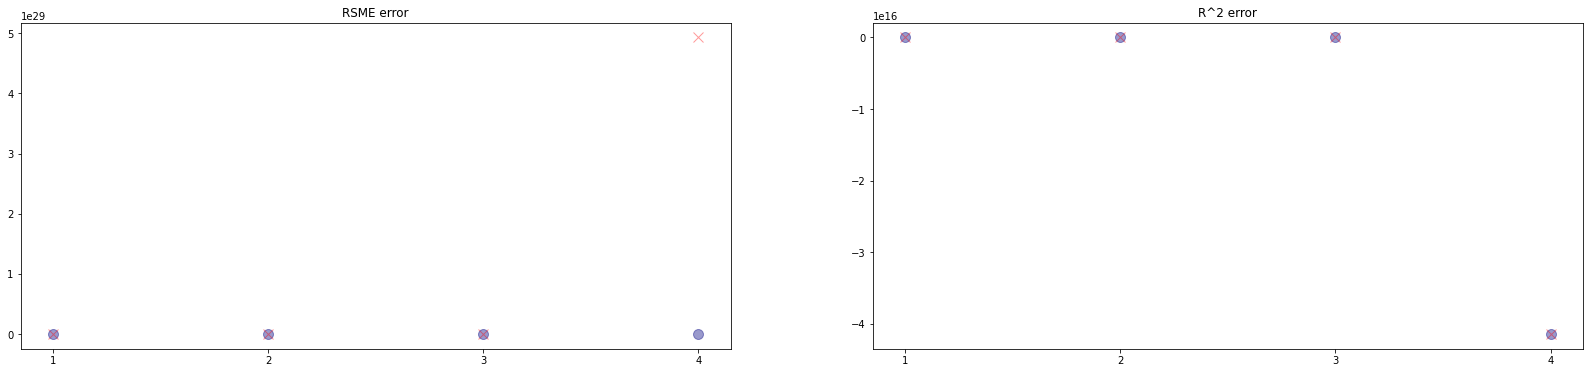

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = df[['Año', 'Kilometraje', 'Transmision']]

#vector x continuo para graficar modelo
x_vals = np.linspace(np.min(X), np.max(X), 100).reshape(-1,3)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(28,6))

""" ax2.set_ylabel(r'$\beta_j$',fontsize=20)
ax2.set_xlabel(r'$j$',fontsize=20)
ax2.set_xticks(np.arange(16))
ax2.set_xlim(0,16) """
color=['b','r','g','gray','orange','magenta']
markers=['v','x','s','o','p','*']

#grados de los polinomios a probar
degrees = [1,2,3,4]

# Listas vacías para guardar errores de entrenamiento y validación
training_error_rmse_pol =  {}
test_error_rmse_pol =  {}

training_error_r2_pol =  {}
test_error_r2_pol = {}
coefs_polinomiales = {}
validation_error = []

for nd,d in enumerate(degrees):

    x_poly_train = PolynomialFeatures(d).fit_transform(x_train)
    x_poly_test = PolynomialFeatures(d).fit_transform(x_test)

    linreg = LinearRegression()
    linreg.fit(x_poly_train, y_train)
    
    #predecimos respuesta para datos de entrenamiento y prueba
    y_train_pred = linreg.predict(x_poly_train)
    y_test_pred = linreg.predict(x_poly_test)
    
    #Cálculo de error (MSE) para datos de entrenamiento y prueba
    training_error_rmse_pol[f'{d}'] = mean_squared_error(y_train_pred,y_train)
    test_error_rmse_pol[f'{d}'] = mean_squared_error(y_test_pred,y_test)
    coefs_polinomiales[f'{d}'] = linreg.coef_
    
    training_error_r2_pol[f'{d}'] = linreg.score(x_poly_train, y_train)
    test_error_r2_pol[f'{d}'] = linreg.score(x_poly_test, y_test)
    #train_score = linreg.score(x_poly_train, y_train)
    #test_score = linreg.score(x_poly_test, y_test)
    
    #predecimos respuesta para un vector x continuo, para graficar el modelo
    x_model = PolynomialFeatures(d).fit_transform(x_vals)
    y_model = linreg.predict(x_model)
    
    #gráficos
    
    #ax1: datos de entrada + modelo
    """ ax1.clear()
    ax1.projection()
    ax1.plot(x_train, y_train, 'o',color='navy',label='Train',markersize=10,alpha=0.4) 
    ax1.plot(x_test, y_test, 'x',color='navy',mfc='None',label='Test',markersize=10) 
    ax1.plot(X, true_fun(X), '-',color='navy',label='True',lw=3,alpha=0.4) 
    ax1.set_xlabel(r'$x$',fontsize=20)
    ax1.set_ylabel(r'$y$',fontsize=20)
    ax1.set_ylim(-1.5,1.5)
    ax1.plot(x_vals,y_model,'--',lw=4,label='M=%d'%d,color=color[nd])
    ax1.text(0,-1.3,r'$R^2_{train}$=%.4f'%train_score,fontsize=14)
    ax1.text(0,-1.1,r'$R^2_{test}$=%.4f'%test_score,fontsize=14)
    ax1.set_title('Regresión Polinomial')
    ax1.legend(loc=1); """
    
    #ax3: MSE vs. grado del polinomio (panel central)
    """ ax3.clear()
    ax3.set_xticks(np.arange(d+1))
    ax3.set_xlabel(r'$j$',fontsize=20)
    ax3.set_ylabel(r'$MSE$',fontsize=20)
    ax3.set_xlim(0,16)
    ax3.set_ylim(0,0.3)

    ax3.plot(degrees[0:nd+1],training_error,'-o',markersize=10,alpha=0.4,color='navy',lw=2,label='Test')
    ax3.plot(degrees[0:nd+1],validation_error,'-x',markersize=10,alpha=0.6,color='navy',lw=3,label='Train')
    
    if nd==0:
        ax3.legend(loc=1);
        
    #ax2 (derecha): coeficientes de la regresión para distintos modelos
    ax2.plot(np.arange(d+1),linreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)
    ax2.legend(loc=3,prop={"size":14}); """
    
    #guardo todas las figuras para la PPT  
    #fig.savefig('%d_fig_%d.png'%(30,d),bbox_inches='tight')

ax1.plot(training_error_rmse_pol.keys(), training_error_rmse_pol.values(), 'o',color='navy',label='Train',markersize=10,alpha=0.4)
ax1.plot(test_error_rmse_pol.keys(), test_error_rmse_pol.values(), 'x',color='red',label='Test',markersize=10,alpha=0.4)
ax1.set_title("RSME error")

ax2.plot(training_error_r2_pol.keys(), test_error_r2_pol.values(), 'o',color='navy',label='Train',markersize=10,alpha=0.4)
ax2.plot(test_error_r2_pol.keys(), test_error_r2_pol.values(), 'x',color='red',label='Test',markersize=10,alpha=0.4)
ax2.set_title("R^2 error")
# graficar coeficientes no tiene mucho sentido, no se entiende nada
#for i, d in enumerate(coefs_polinomiales):
#    ax2.plot(np.arange(len(coefs_polinomiales[d])), coefs_polinomiales[d], marker=markers[i], color=color[i], label=d, markersize=10)